# Import Libraries

In [1]:
##data analysis libraries
import numpy as np
import pandas as pd

##visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

pd.set_option('display.max_columns', None)

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Getting Data

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
df.drop('car_ID', axis=1, inplace=True)

In [8]:
#checking for null values

df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 3)
    
    return multiple_outliers

In [10]:
num = [col for col in df.columns if df[col].dtypes != "O"]

In [11]:
# observations with more than three outliers feature value

df.loc[detect_outliers(df, num)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
49,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


In [12]:
df = df.drop(detect_outliers(df, num), axis = 0).reset_index(drop = True)

In [13]:
df.shape

(201, 25)

In [14]:
# columns that seems numeric but are categorical

[col for col in df.columns if df[col].nunique() <= 6 and df[col].dtypes != "O"]

['symboling']

In [15]:
df['symboling'] = df['symboling'].astype(str)

In [16]:
# categorical columns with too many unique value

[col for col in df.columns if df[col].nunique() > 15 and df[col].dtypes == "O"]

['CarName']

In [17]:
# #Splitting carbrand from CarName column

Brand = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(0, 'Brand', Brand)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,Brand,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
df['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
# fixing typos

def replace(x, y):
    df['Brand'].replace(x, y, inplace=True)

replace('Nissan', 'nissan')
replace('maxda', 'mazda')
replace('porcshce', 'porsche')
replace('toyouta', 'toyota')
replace('vw', 'volkswagen')
replace('vokswagen', 'volkswagen')

### First Inferences

- Although 'symboling' feature seems to be numerical, I will consider it categorically since it has few unique values.
- There is no null value in the dataset.
- I have dropped the observations that have more than 2 outlier features in the outlier analysis.According to this analysis, 9 observations were considered outliers.
- Since the brands of the cars are significant in the model, I have splitted the carname column.


# EDA 

## Analysis of Categorical Variables

In [20]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
for i in categorical:
    print(i, ':', (df[i].unique()))
    print('=' * 80)

Brand : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
symboling : ['3' '1' '2' '0' '-1' '-2']
fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [21]:
def cat_summary(dataframe, target ,col_name):

    print(pd.DataFrame({"Count": dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe),
                       "Price_Mean": dataframe.groupby(col_name)[target].mean()}).sort_values(by=['Price_Mean'],ascending=False),end='\n\n')
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.title('Count Analysis of {} Features'.format(col_name), fontsize=15)
    plt.xticks(rotation=45)    
    plt.subplot(1,2,2)
    ax = sns.boxplot(x=dataframe[col_name], y=dataframe[target])
    ax = sns.swarmplot(x=dataframe[col_name], y=dataframe[target],dodge=True,color='0.1')
    plt.title('Price Analysis of {} Features'.format(col_name), fontsize=15)
    plt.xticks(rotation=45)
    plt.show()
    print('-'*120)

             Count      Ratio    Price_Mean
jaguar           2   0.995025  33900.000000
buick            5   2.487562  32486.400000
porsche          5   2.487562  31400.500000
bmw              8   3.980100  26118.750000
volvo           11   5.472637  18063.181818
audi             7   3.482587  17859.166714
mercury          1   0.497512  16503.000000
alfa-romero      3   1.492537  15498.333333
peugeot         11   5.472637  15489.090909
saab             6   2.985075  15223.333333
mazda           17   8.457711  10652.882353
nissan          18   8.955224  10415.666667
volkswagen      12   5.970149  10077.500000
toyota          32  15.920398   9885.812500
renault          2   0.995025   9595.000000
mitsubishi      13   6.467662   9239.769231
isuzu            4   1.990050   8916.500000
subaru          12   5.970149   8541.250000
honda           13   6.467662   8184.692308
plymouth         7   3.482587   7963.428571
dodge            9   4.477612   7875.444444
chevrolet        3   1.492537   

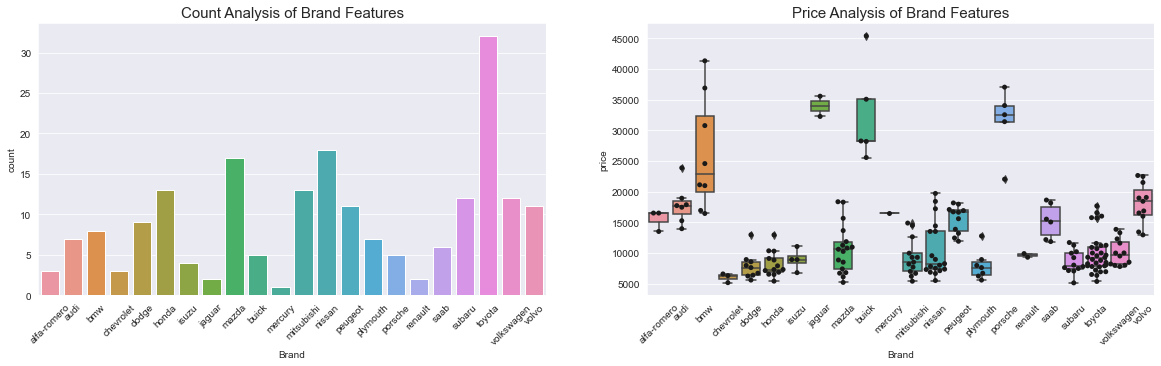

------------------------------------------------------------------------------------------------------------------------
    Count      Ratio    Price_Mean
3      27  13.432836  17221.296296
-2      3   1.492537  15781.666667
-1     20   9.950249  15774.550000
0      65  32.338308  13625.025646
2      32  15.920398  10109.281250
1      54  26.865672  10037.907407



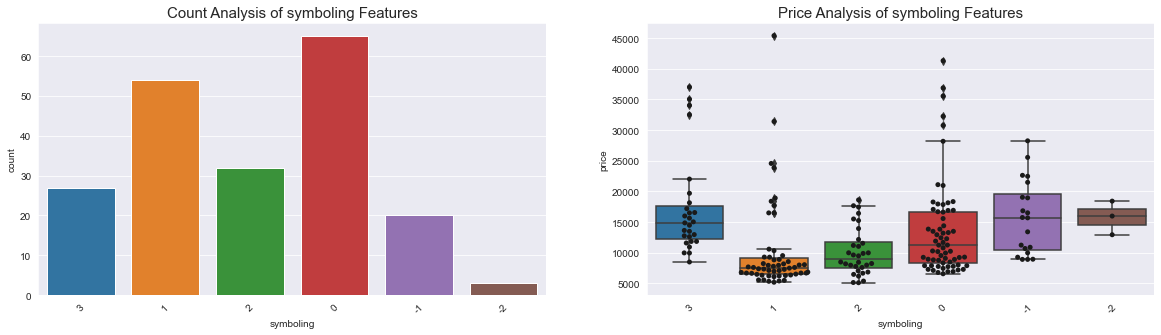

------------------------------------------------------------------------------------------------------------------------
        Count      Ratio    Price_Mean
diesel     19   9.452736  15008.578947
gas       182  90.547264  12603.399269



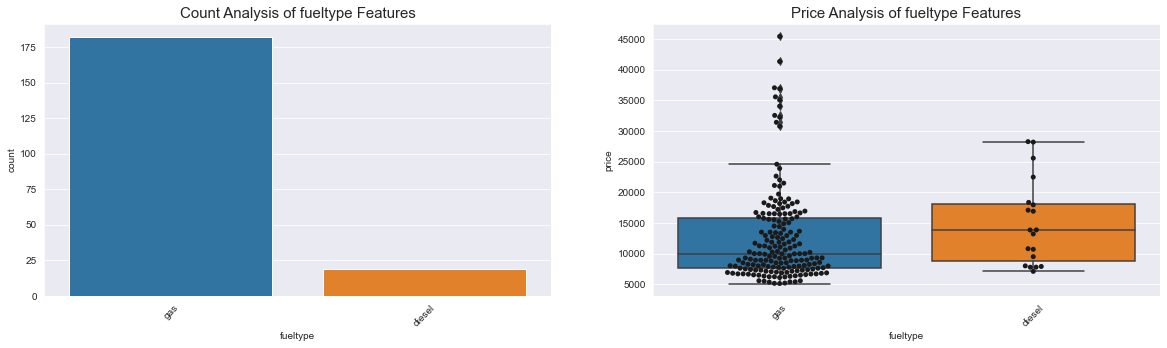

------------------------------------------------------------------------------------------------------------------------
       Count      Ratio    Price_Mean
turbo     36  17.910448  15873.115750
std      165  82.089552  12166.966667



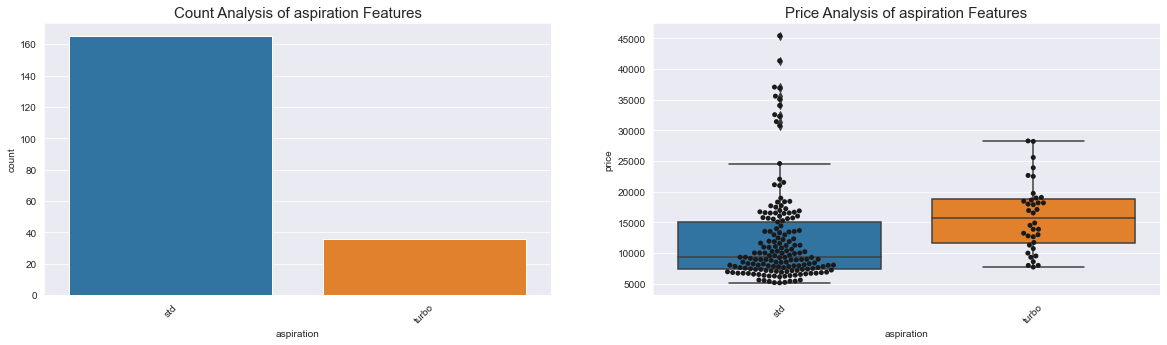

------------------------------------------------------------------------------------------------------------------------
      Count      Ratio    Price_Mean
four    112  55.721393  12909.718750
two      89  44.278607  12731.383899



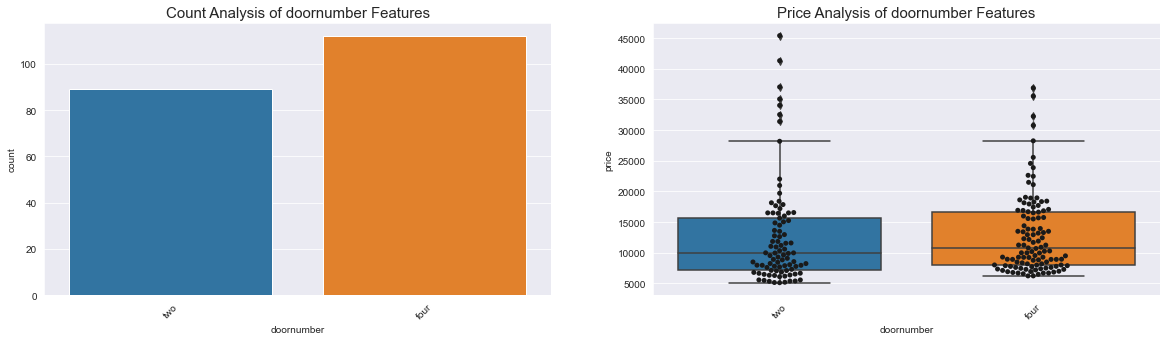

------------------------------------------------------------------------------------------------------------------------
             Count      Ratio    Price_Mean
hardtop          8   3.980100  22208.500000
convertible      6   2.985075  21890.500000
sedan           92  45.771144  13416.369565
wagon           25  12.437811  12371.960000
hatchback       70  34.825871  10376.652386



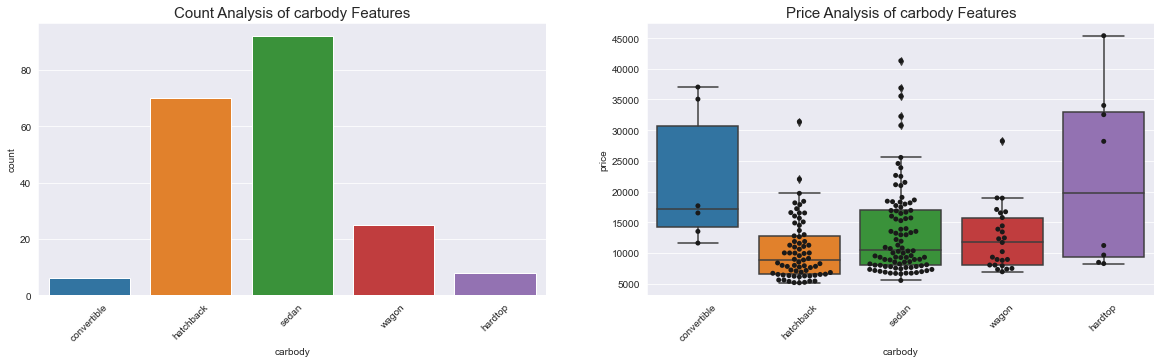

------------------------------------------------------------------------------------------------------------------------
     Count      Ratio    Price_Mean
rwd     72  35.820896  19034.409722
4wd      9   4.477612  11087.463000
fwd    120  59.701493   9239.308333



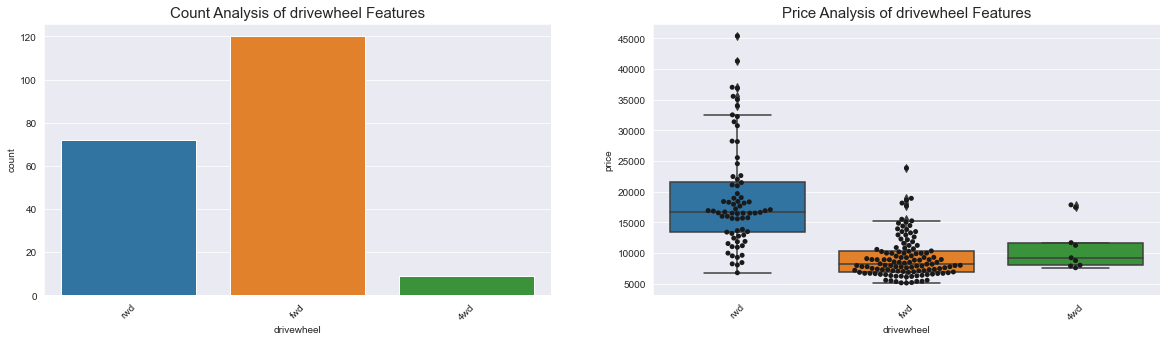

------------------------------------------------------------------------------------------------------------------------
       Count      Ratio    Price_Mean
rear       3   1.492537  34528.000000
front    198  98.507463  12502.008419



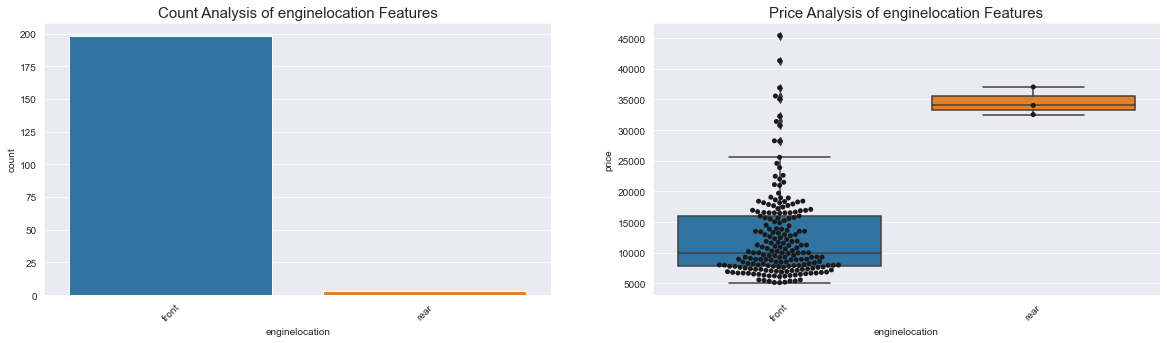

------------------------------------------------------------------------------------------------------------------------
       Count      Ratio    Price_Mean
dohcv      1   0.497512  31400.500000
ohcv      10   4.975124  21513.500000
dohc      12   5.970149  18116.416667
l         12   5.970149  14627.583333
ohcf      15   7.462687  13738.600000
rotor      4   1.990050  13020.000000
ohc      147  73.134328  11437.817463



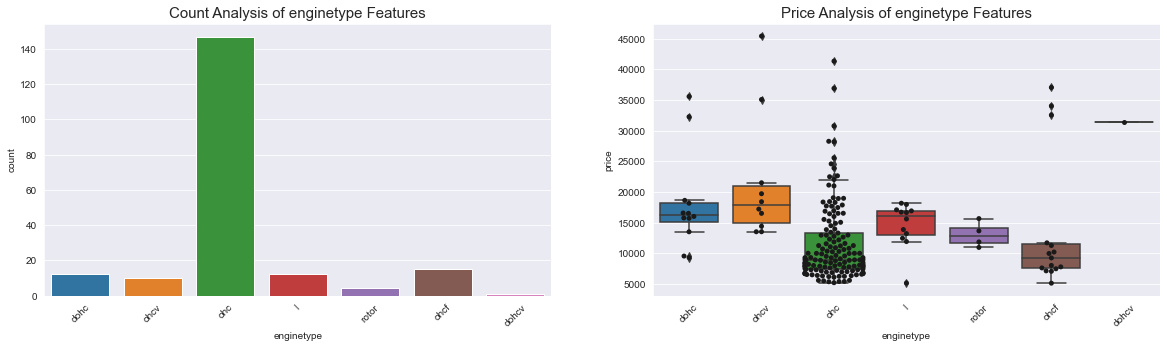

------------------------------------------------------------------------------------------------------------------------
       Count      Ratio    Price_Mean
eight      3   1.492537  37285.500000
six       24  11.940299  23671.833333
five      10   4.975124  20633.516700
two        4   1.990050  13020.000000
four     159  79.104478  10285.754717
three      1   0.497512   5151.000000



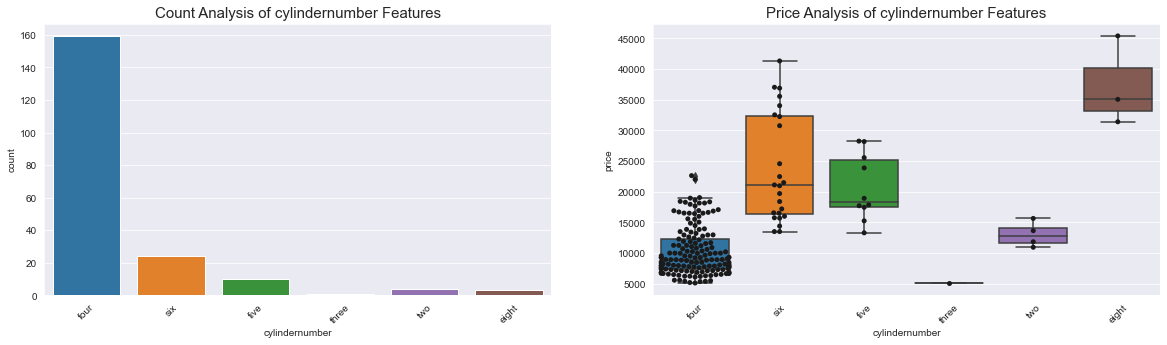

------------------------------------------------------------------------------------------------------------------------
      Count      Ratio    Price_Mean
mpfi     91  45.273632  17118.556780
idi      19   9.452736  15008.578947
mfi       1   0.497512  12964.000000
4bbl      3   1.492537  12145.000000
spfi      1   0.497512  11048.000000
spdi      9   4.477612  10990.444444
1bbl     11   5.472637   7555.545455
2bbl     66  32.835821   7478.151515



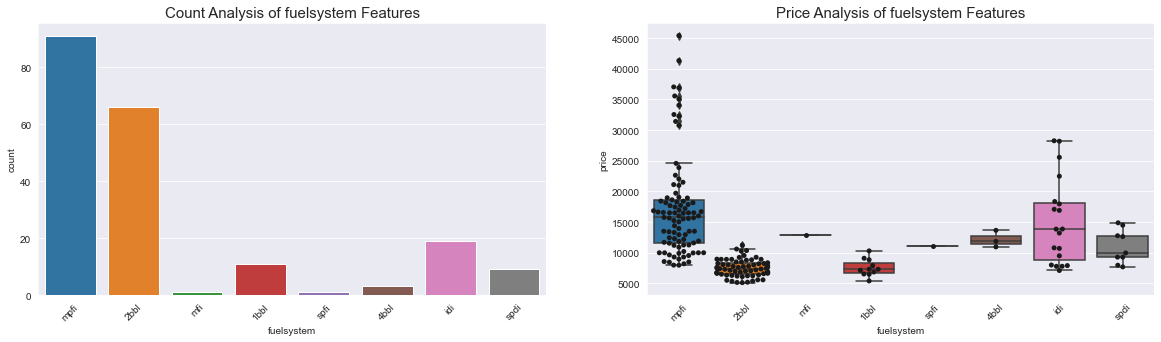

------------------------------------------------------------------------------------------------------------------------


In [22]:
for col in categorical:
    cat_summary(df, 'price', col)

In [23]:
#dropping engine location since it is highly imbalanced

df.drop('enginelocation', axis=1, inplace=True)

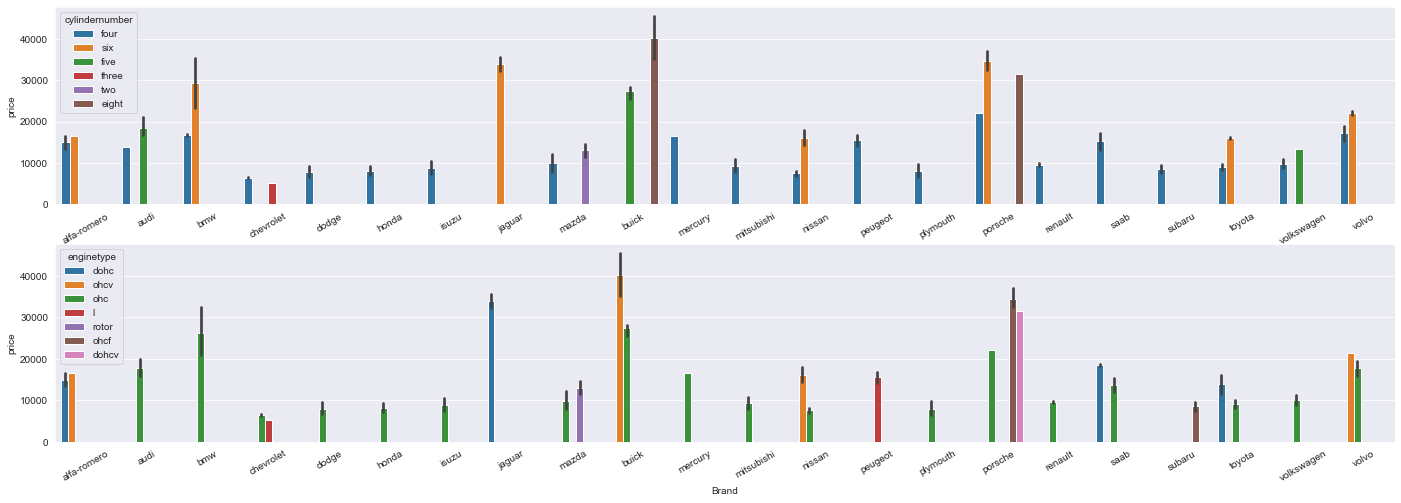

In [23]:
plt.figure(figsize=(24, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='Brand', y='price', hue='cylindernumber', data=df)
plt.xticks(rotation=30)

plt.subplot(2, 1, 2)
sns.barplot(x='Brand', y='price', hue='enginetype', data=df)
plt.xticks(rotation=30)

plt.show()

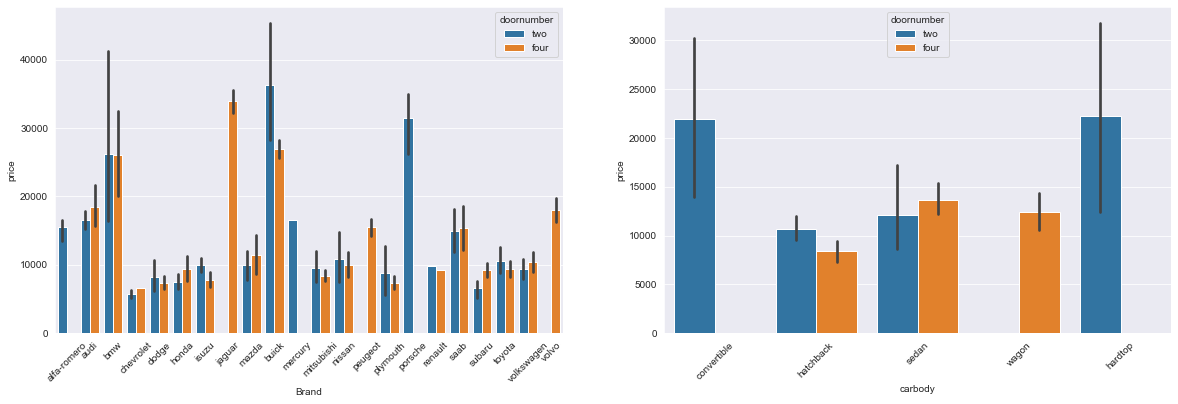

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Brand', y='price', hue='doornumber', data=df)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='carbody', y='price', hue='doornumber', data=df)
plt.xticks(rotation=45)

plt.show()

In [25]:
#dropping door number since it is non significant

df.drop('doornumber', axis=1, inplace=True)

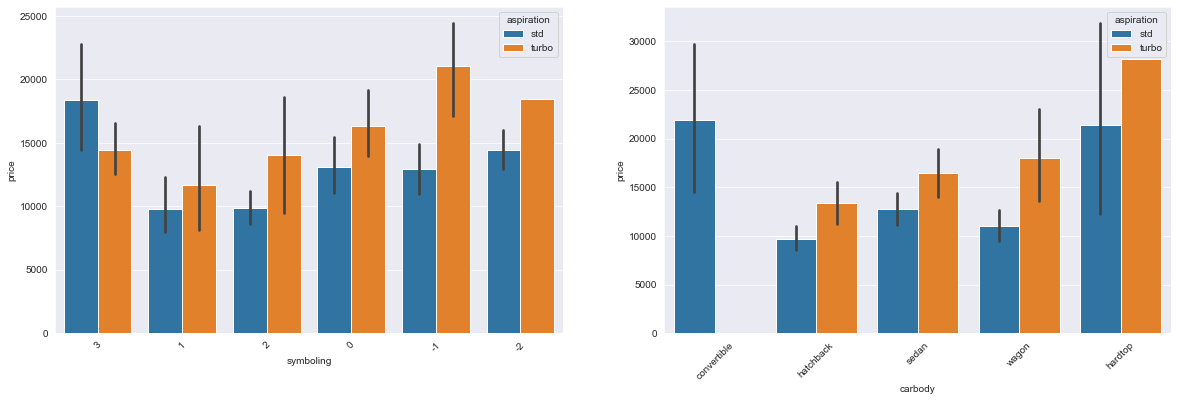

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='symboling', y='price', hue='aspiration', data=df)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='carbody', y='price', hue='aspiration', data=df)
plt.xticks(rotation=45)

plt.show()

## Analysis of Numerical Variables

In [27]:
df.describe(percentiles=[.1, .25, .5, .75, .9, .95]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
wheelbase,201.0,98.462687,5.617735,86.60,93.70,94.50,96.90,101.20,107.90,109.10,114.20
carlength,201.0,173.507960,11.808977,141.10,157.30,166.30,173.00,180.30,188.80,192.70,199.60
carwidth,201.0,65.798010,2.017051,60.30,63.80,64.00,65.50,66.50,68.40,69.60,72.30
carheight,201.0,53.712935,2.408035,48.80,50.60,52.00,54.10,55.50,56.50,57.50,59.80
curbweight,201.0,2530.004975,492.671275,1488.00,1945.00,2145.00,2410.00,2912.00,3157.00,3380.00,4066.00
enginesize,201.0,124.203980,36.417210,61.00,91.00,97.00,111.00,141.00,173.00,194.00,304.00
boreratio,201.0,3.324478,0.270316,2.54,2.97,3.15,3.31,3.58,3.63,3.78,3.94
stroke,201.0,3.256269,0.313332,2.07,2.90,3.11,3.29,3.41,3.54,3.64,4.17
compressionratio,201.0,10.099104,3.923857,7.00,8.00,8.60,9.00,9.40,10.00,21.90,23.00
horsepower,201.0,102.587065,37.701374,48.00,68.00,70.00,95.00,116.00,160.00,176.00,288.00


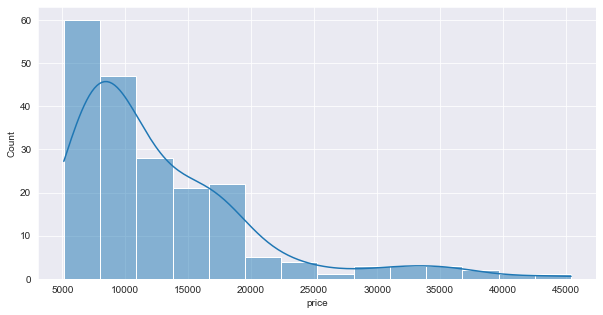

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='price', kde=True)
plt.show()

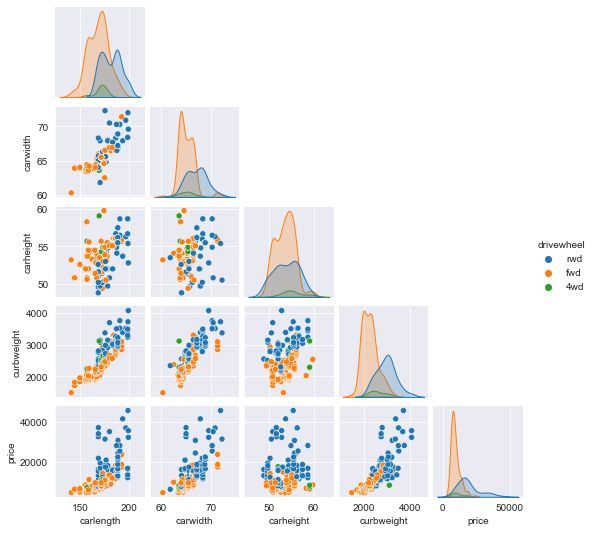

In [29]:
sns.pairplot(df, vars=['carlength', 'carwidth', 'carheight', 'curbweight', 'price'], height = 1.5, hue='drivewheel', corner=True);

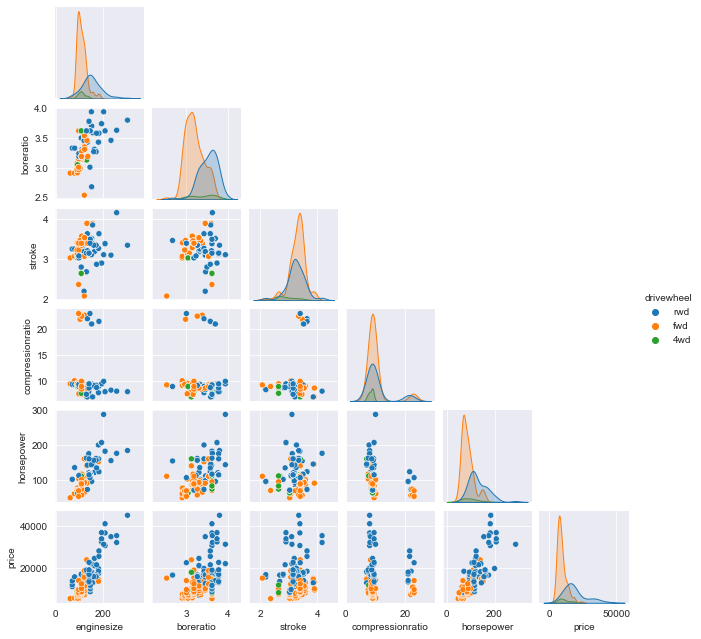

In [30]:
sns.pairplot(df, vars=['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'price'], height = 1.5, hue='drivewheel', corner=True);

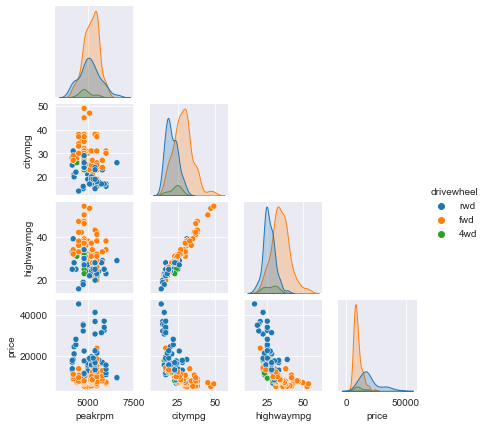

In [31]:
sns.pairplot(df, vars=['peakrpm', 'citympg', 'highwaympg', 'price'], hue='drivewheel', height = 1.5, corner=True);

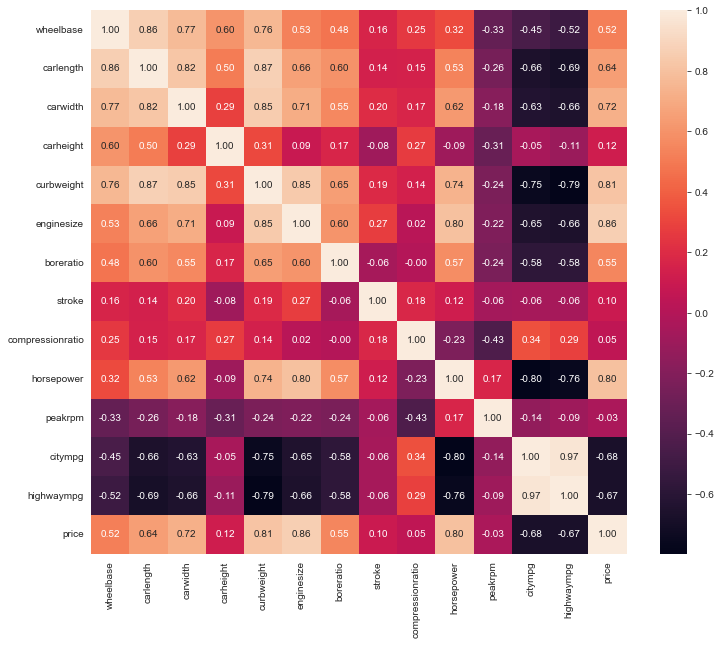

In [32]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [33]:
drops = ['stroke', 'compressionratio', 'peakrpm']
df.drop(drops, axis=1, inplace=True)

### Some Inferences

- Jaguar, Buick and Porsche are the most expensive car brands.
- numberdoor is not a significant variable on the price.
- drivewheel column is a categorical column with a significant on price.
- Target variable(price) is right skewed. 
- Car height, stroke, compression ratio, peak rpm have no significant effect on price.

In [34]:
df_ = df.copy()

In [35]:
df_

,Brand,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,-1,gas,std,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
197,volvo,-1,gas,turbo,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
198,volvo,-1,gas,std,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
199,volvo,-1,diesel,turbo,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


# Feature Engineering

In [36]:
df_['car_volume'] = df_['carlength'] **2 * df_['carwidth'] **2 * df_['carheight']
df_['engine_hp'] = df_['enginesize'] * df_['horsepower']
df_['city_highway_mpg'] = df_['citympg'] * df_['highwaympg']
df_['curb_bore'] = df_['curbweight'] * df_['boreratio']


In [37]:
df_.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

In [38]:
df_.head()

,Brand,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,car_volume,engine_hp,city_highway_mpg,curb_bore
0,alfa-romero,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,13495.0,5.713218e+09,14430,567,8841.56
1,alfa-romero,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,16500.0,5.713218e+09,14430,567,8841.56
2,alfa-romero,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,16500.0,6.589029e+09,23408,494,7565.64
3,audi,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,13950.0,7.421594e+09,11118,720,7455.03
4,audi,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,17450.0,7.466505e+09,15640,396,9008.56


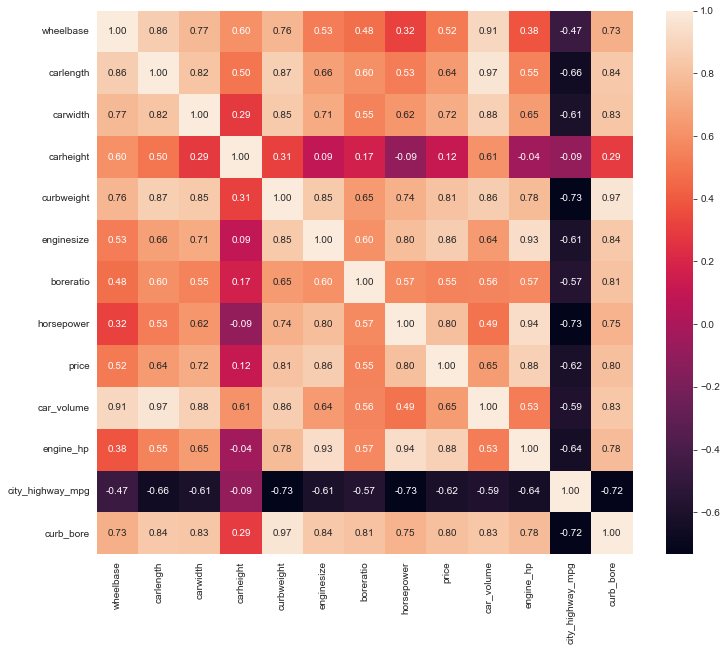

In [39]:
corr = df_.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [40]:
drops_2 = ['curbweight', 'enginesize', 'carlength', 'carheight', 'horsepower']
df_.drop(drops_2, axis=1, inplace=True )

In [41]:
[col for col in df.columns if df[col].nunique() <= 4 and df[col].dtypes == "O"]

['fueltype', 'aspiration', 'drivewheel', 'enginelocation']

In [42]:
cat_dummy = [col for col in df.columns if df[col].nunique() <= 4  and df[col].dtypes == "O"]

for col in cat_dummy :
    dummies = pd.get_dummies(df_[col], drop_first=True)
    df_[dummies.columns] = dummies

In [43]:
df_.drop(cat_dummy, axis=1, inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder

cat_encode = [col for col in df.columns if df[col].nunique() > 4  and df[col].dtypes == "O"]

le=LabelEncoder();
for col in cat_encode:
    
    df_[col]=le.fit_transform(df_[col]);

In [45]:
df_.head()

,Brand,symboling,carbody,wheelbase,carwidth,enginetype,cylindernumber,fuelsystem,boreratio,price,car_volume,engine_hp,city_highway_mpg,curb_bore,gas,turbo,fwd,rwd,rear
0,0,5,0,88.6,64.1,0,2,5,3.47,13495.0,5.713218e+09,14430,567,8841.56,1,0,0,1,0
1,0,5,0,88.6,64.1,0,2,5,3.47,16500.0,5.713218e+09,14430,567,8841.56,1,0,0,1,0
2,0,3,2,94.5,65.5,5,3,5,2.68,16500.0,6.589029e+09,23408,494,7565.64,1,0,0,1,0
3,1,4,3,99.8,66.2,3,2,5,3.19,13950.0,7.421594e+09,11118,720,7455.03,1,0,1,0,0
4,1,4,3,99.4,66.4,3,1,5,3.19,17450.0,7.466505e+09,15640,396,9008.56,1,0,0,0,0


# Modelling

In [46]:
y = df_['price']
X = df_.drop('price', axis=1)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 134
The number of observations in test set is 67


In [48]:
def run_evaluate(model):
    
    model.fit(X_train, y_train)
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)
    print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
    print("-----Test set statistics-----")
    print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
    print(end='\n')

In [49]:
lrm = LinearRegression()
run_evaluate(lrm)

R-squared of the model in training set is: 0.8917104582415659
-----Test set statistics-----
R-squared of the model in test set is: 0.87441376306198
Mean absolute error of the prediction is: 2096.263790142989
Mean squared error of the prediction is: 8855756.125249738
Root mean squared error of the prediction is: 2975.8622490380394
Mean absolute percentage error of the prediction is: 15.284281268359035



In [50]:
ridge = Ridge()
run_evaluate(model=ridge)

R-squared of the model in training set is: 0.8869847368001103
-----Test set statistics-----
R-squared of the model in test set is: 0.8633526009589642
Mean absolute error of the prediction is: 2204.1972428820764
Mean squared error of the prediction is: 9635737.725419085
Root mean squared error of the prediction is: 3104.1484702602556
Mean absolute percentage error of the prediction is: 15.644764809394566



In [51]:
lasso = Lasso()
run_evaluate(model=lasso)

R-squared of the model in training set is: 0.89170174210401
-----Test set statistics-----
R-squared of the model in test set is: 0.8744182720880815
Mean absolute error of the prediction is: 2096.5510787857347
Mean squared error of the prediction is: 8855438.169743696
Root mean squared error of the prediction is: 2975.8088261418434
Mean absolute percentage error of the prediction is: 15.285209000024654



In [52]:
lgbm_model = LGBMRegressor()
run_evaluate(lgbm_model)

R-squared of the model in training set is: 0.9148103377317017
-----Test set statistics-----
R-squared of the model in test set is: 0.8271886900157512
Mean absolute error of the prediction is: 2144.2981681539086
Mean squared error of the prediction is: 12185848.180646753
Root mean squared error of the prediction is: 3490.823424443974
Mean absolute percentage error of the prediction is: 13.401639978823937



## Hyperparameter Optimization 

In [53]:
lambdas = 10**np.linspace(100,-2,10)*0.5

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

ridge_cv.fit(X_train, y_train)
ridge_alpha = ridge_cv.alpha_

ridge = Ridge(alpha = ridge_alpha)
run_evaluate(model=ridge)

R-squared of the model in training set is: 0.8917098456442991
-----Test set statistics-----
R-squared of the model in test set is: 0.8743934438700737
Mean absolute error of the prediction is: 2096.4071614056006
Mean squared error of the prediction is: 8857188.939963931
Root mean squared error of the prediction is: 2976.102978723003
Mean absolute percentage error of the prediction is: 15.284822957964739



In [54]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas = lambdas, 
                         cv = 10, 
                         max_iter = 1000, 
                         normalize = True)
lasso_cv_model.fit(X_train,y_train)
lasso_alpha = lasso_cv_model.alpha_

lasso = Lasso(alpha = lasso_alpha)
run_evaluate(model=lasso)


R-squared of the model in training set is: 0.8917104580236626
-----Test set statistics-----
R-squared of the model in test set is: 0.8744138506672263
Mean absolute error of the prediction is: 2096.265226865173
Mean squared error of the prediction is: 8855749.94773606
Root mean squared error of the prediction is: 2975.8612111010925
Mean absolute percentage error of the prediction is: 15.284285894092767



In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
lgbm_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.1, 0.01, 0.05],
        "min_child_samples": [5, 10, 20]}

In [58]:
lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs = -1, verbose = 0)
lgbm_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0]})

In [59]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [60]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.05, 
                           max_depth =3, 
                           n_estimators = 100,
                           colsample_bytree = 1,
                           min_child_samples = 5)
                            
run_evaluate(lgbm_tuned)


R-squared of the model in training set is: 0.961333466656501
-----Test set statistics-----
R-squared of the model in test set is: 0.9267953661805467
Mean absolute error of the prediction is: 1515.077427549134
Mean squared error of the prediction is: 5162049.601527851
Root mean squared error of the prediction is: 2272.014436910085
Mean absolute percentage error of the prediction is: 10.866279974520921



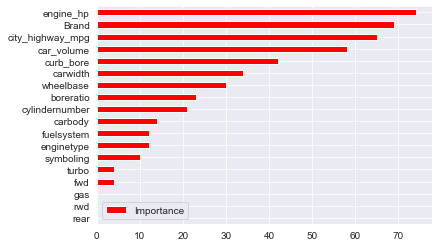

In [61]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_},
                           index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r");